# Polars

<img src="images/polars_github_banner.svg" alt="Drawing" style="width: 750px;"/> 

<a href="https://colab.research.google.com/github/milocortes/diplomado_ciencia_datos_mide/blob/edicion-2024/notebooks/polars_mide_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


* Pandas es lento e ineficiente al trabajar con datasets grandes.
* Existen varias bibliotecas que atienden este problema. Una de ellas es **[Polars]()**.
* **[Polars]()** es una biblioteca desarrollada en [Rust]() que integra las siguientes características por diseño:
  * **Velocidad**
    - Rust es un lenguaje de system programmig conocido por su desempeño y seguridad.
  * **Paralelismo**
    - Aprovecha arquitecturas multicore he implementa algoritmos paralelos de work stealing.
  * **Eficiencia de memoria**
    - Polars utiliza evaluaciones **lazy**, lo que significa que una operación no es realizada hasta que esta es necesitada.
    - Las consultas pueden ser encadenadas y optimizadas antes de su ejecución, lo que se traduce en ejecuciones más eficientes de queries.
  * **Almacenamiento eficiente de datos**
    - Polar utiliza **Apache Arrow como modelo de almacenamiento en memoria**. Es decir, utiliza un formato columnar del almacenamiento de datos, lo cual resulta más eficiente que el tradicional almacenamiento basado en filas (como el utilizado por Pandas).
  * **Fácil de usar**
    - Polar soporta una sintaxis similar a SQL para la manipulación de datos, haciendo accesible su uso a un grupo grande de usuarios.
    



## Instalación de Polars

Polart utiliza las siguientes dependencias:

| Paquete    | Descripción                                                                  |
|:-----------|:-----------------------------------------------------------------------------|
| all        | Install all optional dependencies (all of the following)                     |
| pandas     | Install with Pandas for converting data to and from Pandas Dataframes/Series |
| numpy      | Install with numpy for converting data to and from numpy arrays              |
| pyarrow    | Reading data formats using PyArrow                                           |
| fsspec     | Support for reading from remote file systems                                 |
| connectorx | Support for reading from SQL databases                                       |
| xlsx2csv   | Support for reading from Excel files                                         |
| deltalake  | Support for reading from Delta Lake Tables                                   |
| timezone   | Timezone support, only needed if are on Python<3.9 or you are on Windows     |


Para instalar Polars con todas sus dependencias, ejecuta la instrucción:

In [ ]:
!pip install 'polars[all]'

Para instalar un subconjunto de dependencias, ejecuta:

In [ ]:
!pip install 'polars[pandas,numpy]'

Para instalar Polars, en su versión base, ejecuta la siguiente instrucción:


In [1]:
!pip install polars

>Polars hace uso de operaciones SIMD para aprovechar el paralelismo de datos. Un avance significativo en el paralelismo SIMD ocurrió cuando se incorporó al conjunto de instrucciones de la arquitectura x86 la extensión Advanced Vector Extensions (AVX), la cual permitió un uso más eficiente de las operaciones a nivel CPU. Esta extensión fue implementada por primera vez por AMD e Intel en 2011. En procesadores anteriores a este año, no se encuentra incluida dicha extensión. Por su parte, la instrucción no se encuentra disponibles en arquitecturas ARM. En caso que utilices alguna arquitectura que no soporte operaciones AVX, necesitas instalar <code>polars-lts-cpu</code>. Este paquete puede ser descargado de PyPI con la instrucción <code>pip install polars-lts-cpu</code>

## Creación de <code>DataFrame</code> en Polars

Al igual que en Pandas, podemos crear un <code>DataFrame</code> de Polars mediante un diccionario de Python:

In [2]:
import polars as pl
 
df = pl.DataFrame(
     {
         'Model': ['Camry','Corolla','RAV4',
                   'Mustang','F-150','Escape',
                   'Golf','Tiguan'],
         'Year': [1982,1966,1994,1964,1975,2000,1974,2007],   
         'Engine_Min':[2.5,1.8,2.0,2.3,2.7,1.5,1.0,1.4],
         'Engine_Max':[3.5,2.0,2.5,5.0,5.0,2.5,2.0,2.0],
         'AWD':[False,False,True,False,True,True,True,True],
         'Company': ['Toyota','Toyota','Toyota','Ford',
                     'Ford','Ford','Volkswagen','Volkswagen'],
     }
)
df

Model,Year,Engine_Min,Engine_Max,AWD,Company
str,i64,f64,f64,bool,str
"""Camry""",1982,2.5,3.5,false,"""Toyota"""
"""Corolla""",1966,1.8,2.0,false,"""Toyota"""
"""RAV4""",1994,2.0,2.5,true,"""Toyota"""
"""Mustang""",1964,2.3,5.0,false,"""Ford"""
"""F-150""",1975,2.7,5.0,true,"""Ford"""
"""Escape""",2000,1.5,2.5,true,"""Ford"""
"""Golf""",1974,1.0,2.0,true,"""Volkswagen"""
"""Tiguan""",2007,1.4,2.0,true,"""Volkswagen"""


La salida es similar a un <code>DataFrame</code> de Pandas, a excepción que:
* Los <code>DataFrame</code> en Polars no tienen un índice. Esta es una de las características detrás de la filosofía de diseño de Polars.
* Se muestra el tipo de dato de cada columna.

Si queremos saber el tipo de dato de cada columna del <code>DataFrame</code>, ejecutamos la instrucción:

In [3]:
df.dtypes

[String, Int64, Float64, Float64, Boolean, String]

La siguiente instrucción regresa el nombre de las columnas:

In [4]:
df.columns 

['Model', 'Year', 'Engine_Min', 'Engine_Max', 'AWD', 'Company']

Si queremos obtener todas las filas del <code>DataFrame</code>, usamos el método <code>rows()</code> 

In [5]:
df.rows()

[('Camry', 1982, 2.5, 3.5, False, 'Toyota'),
 ('Corolla', 1966, 1.8, 2.0, False, 'Toyota'),
 ('RAV4', 1994, 2.0, 2.5, True, 'Toyota'),
 ('Mustang', 1964, 2.3, 5.0, False, 'Ford'),
 ('F-150', 1975, 2.7, 5.0, True, 'Ford'),
 ('Escape', 2000, 1.5, 2.5, True, 'Ford'),
 ('Golf', 1974, 1.0, 2.0, True, 'Volkswagen'),
 ('Tiguan', 2007, 1.4, 2.0, True, 'Volkswagen')]

Dicha instrucción nos regresa todas las filas como una lista de tuplas:

In [6]:
[('Camry', 1982, 2.5, 3.5, False, 'Toyota'),
 ('Corolla', 1966, 1.8, 2.0, False, 'Toyota'),
 ('RAV4', 1994, 2.0, 2.5, True, 'Toyota'),
 ('Mustang', 1964, 2.3, 5.0, False, 'Ford'),
 ('F-150', 1975, 2.7, 5.0, True, 'Ford'),
 ('Escape', 2000, 1.5, 2.5, True, 'Ford'),
 ('Golf', 1974, 1.0, 2.0, True, 'Volkswagen'),
 ('Tiguan', 2007, 1.4, 2.0, True, 'Volkswagen')]

[('Camry', 1982, 2.5, 3.5, False, 'Toyota'),
 ('Corolla', 1966, 1.8, 2.0, False, 'Toyota'),
 ('RAV4', 1994, 2.0, 2.5, True, 'Toyota'),
 ('Mustang', 1964, 2.3, 5.0, False, 'Ford'),
 ('F-150', 1975, 2.7, 5.0, True, 'Ford'),
 ('Escape', 2000, 1.5, 2.5, True, 'Ford'),
 ('Golf', 1974, 1.0, 2.0, True, 'Volkswagen'),
 ('Tiguan', 2007, 1.4, 2.0, True, 'Volkswagen')]

Con el <code>DataFrame</code> cargado, lo manipularemos para seleccionar partes de este.

## Selección de columnas

Para seleccionar una columna particular en el dataframe, usamos el método <code>select()</code>:

In [7]:
df.select(
    "Model"
)


Model
str
"""Camry"""
"""Corolla"""
"""RAV4"""
"""Mustang"""
"""F-150"""
"""Escape"""
"""Golf"""
"""Tiguan"""


Podríamos el estilo Pandas de selección de columnas <code>df["Model"]</code> y funcionaría en Polars. Sin embargo, en la documentación de Polars se considera un anti-patrón de diseño. De manera que es posible que este estilo de selección sea removido de Polars en futuras versiones.

Si se desea obtener más de una columna, pasamos como argumento una lista con los nombres de las columnas: 

In [8]:
df.select(
    ["Model", "Company"]
)

Model,Company
str,str
"""Camry""","""Toyota"""
"""Corolla""","""Toyota"""
"""RAV4""","""Toyota"""
"""Mustang""","""Ford"""
"""F-150""","""Ford"""
"""Escape""","""Ford"""
"""Golf""","""Volkswagen"""
"""Tiguan""","""Volkswagen"""


Si se requiere obtener todas las columnas de tipo string (esto es, de tipo <code>pl.Utf8</code>) del dataframe, podemos utilizar una **expresión** dentro del método <code>select()</code> 

In [9]:
df.select(
    pl.col(pl.Utf8)
)

Model,Company
str,str
"""Camry""","""Toyota"""
"""Corolla""","""Toyota"""
"""RAV4""","""Toyota"""
"""Mustang""","""Ford"""
"""F-150""","""Ford"""
"""Escape""","""Ford"""
"""Golf""","""Volkswagen"""
"""Tiguan""","""Volkswagen"""


> La instrucción <code>pl.col(pl.Utf8)</code> es conocida como una **expresión** en Polars. Esta expresión puede interpretarse como "dame todas las columnas cuyo tipo de dato es <code>Utf8</code>".
> En términos más generales, las **expresiones** son construidas mediante **metaprogramación**. La **metaprogramación** es una técnica para la creación de código que crea código. La **metaprogramación** permite agregar funcionalidades adicionales a la sintaxis básica del lenguaje de programación, lo que es conocido como Domain Specific Language (DSL). En Rust, la **metaprogramación** es ampliamente usada. 

Las expresiones son muy poderosas en Polars. Por ejemplo, podemos encadenar múltiples expresiones:

In [10]:
df.select(
    pl.col(["Year", "Model", "Engine_Max"])
    .sort_by(["Engine_Max", "Year"], descending = [False,True])
)

Year,Model,Engine_Max
i64,str,f64
2007,"""Tiguan""",2.0
1974,"""Golf""",2.0
1966,"""Corolla""",2.0
2000,"""Escape""",2.5
1994,"""RAV4""",2.5
1982,"""Camry""",3.5
1975,"""F-150""",5.0
1964,"""Mustang""",5.0


Podemos agrupar múltiples expresiones en una lista. Por ejemplo, el siguiente bloque de código regresa las columnas de tipo string y adicionalmente la columna Year:

In [11]:
df.select(
    [pl.col(pl.Utf8), 'Year']
)

Model,Company,Year
str,str,i64
"""Camry""","""Toyota""",1982
"""Corolla""","""Toyota""",1966
"""RAV4""","""Toyota""",1994
"""Mustang""","""Ford""",1964
"""F-150""","""Ford""",1975
"""Escape""","""Ford""",2000
"""Golf""","""Volkswagen""",1974
"""Tiguan""","""Volkswagen""",2007


## Selección de filas

Si queremos obtener una fila particular en el <code>DataFrame</code> de Polars, podemos utilizar el método <code>row()</code> y pasar como argumento el número de la fila. Por ejemplo, la siguiente instrucción regresa la primer fila de la tabla:

In [12]:
df.row(0)

('Camry', 1982, 2.5, 3.5, False, 'Toyota')

Si se desea obtener múltiples filas, podemos usar el estilo Pandas mediante el uso del método de indización por corchetes cuadrados:

In [13]:
df[1:3] # regresa la segunda hasta la cuarta fila 

Model,Year,Engine_Min,Engine_Max,AWD,Company
str,i64,f64,f64,bool,str
"""Corolla""",1966,1.8,2.0,false,"""Toyota"""
"""RAV4""",1994,2.0,2.5,true,"""Toyota"""


> Esta forma de acceso a filas no es recomendado en Polars. La documentación de Polar alienta el uso de formás más explícitas de consulta y funciones para manipular los datos. Por lo general se las consultas a filas están basadas en ciertos criterios, en lugar del índice específico de estas. 

Para la selección de filas, Polars recomienda el uso del método <code>filter()</code>. Por ejemplo, si se desea seleccionar todas las filas de los autos de Toyota, utilizamos el método <code>filter()</code> con la siguiente expresión:

In [14]:
df.filter(
    pl.col("Company")=="Toyota"
)

Model,Year,Engine_Min,Engine_Max,AWD,Company
str,i64,f64,f64,bool,str
"""Camry""",1982,2.5,3.5,false,"""Toyota"""
"""Corolla""",1966,1.8,2.0,false,"""Toyota"""
"""RAV4""",1994,2.0,2.5,true,"""Toyota"""


Podemos especificar múltiples condiciones usando operadores lógicos. La siguiente instrucción regresa todos los autos que son de Toyota o Ford:

In [15]:
df.filter(
    (pl.col("Company")=="Toyota") |
    (pl.col("Company")=="Ford")
)

Model,Year,Engine_Min,Engine_Max,AWD,Company
str,i64,f64,f64,bool,str
"""Camry""",1982,2.5,3.5,false,"""Toyota"""
"""Corolla""",1966,1.8,2.0,false,"""Toyota"""
"""RAV4""",1994,2.0,2.5,true,"""Toyota"""
"""Mustang""",1964,2.3,5.0,false,"""Ford"""
"""F-150""",1975,2.7,5.0,true,"""Ford"""
"""Escape""",2000,1.5,2.5,true,"""Ford"""


La siguiente instrucción regresa todos los autos de Toyota que salieron al mercado después de 1980:

In [16]:
df.filter(
    (pl.col("Company") == "Toyota") &
    (pl.col("Year") > 1980)
)

Model,Year,Engine_Min,Engine_Max,AWD,Company
str,i64,f64,f64,bool,str
"""Camry""",1982,2.5,3.5,false,"""Toyota"""
"""RAV4""",1994,2.0,2.5,true,"""Toyota"""


La siguiente instrucción regresa todos los autos menos los Toyota:

In [17]:
df.filter(
    ~(pl.col("Company") == "Toyota")
)

Model,Year,Engine_Min,Engine_Max,AWD,Company
str,i64,f64,f64,bool,str
"""Mustang""",1964,2.3,5.0,false,"""Ford"""
"""F-150""",1975,2.7,5.0,true,"""Ford"""
"""Escape""",2000,1.5,2.5,true,"""Ford"""
"""Golf""",1974,1.0,2.0,true,"""Volkswagen"""
"""Tiguan""",2007,1.4,2.0,true,"""Volkswagen"""


## Selección de filas y columnas

Ya que conocemos el uso de los métodos <code>select()</code> para seleccionar columnas y <code>filter()</code> para seleccionar filas en un <code>DataFrame</code> de Polars, veremos cómo podemos encadenar estos métodos para seleccionar filas y columnas específicas.

Por ejemplo, si queremos conocer todos los modelos de Toyota, podemos encadenar los métodos <code>filter()</code> y <code>select()</code> de la siguiente manera:

In [18]:
df.filter(
    pl.col("Company") == "Toyota"
).select(
    "Model"
)

Model
str
"""Camry"""
"""Corolla"""
"""RAV4"""


Si queremos seleccionar múltiples columnas, agregamos en una lista los nombres de las columnas que necesitamos:

In [19]:
df.filter(
    pl.col("Company")=="Toyota"
).select(
    ["Model", "Year"]
)

Model,Year
str,i64
"""Camry""",1982
"""Corolla""",1966
"""RAV4""",1994


En la siguente sección veremos cómo Polars utiliza la técnica de **lazy evaluation** para mejorar el desempeño en la manipulación de nuestro dataframe.

## Lazy evaluation en Polars

* Una de las características principales de Polars es el uso de **lazy evaluation**. 

* **Lazy evaluation** es una técnica que nos permite construi un plan de consultas que represente una secuencia de operaciones sin tener que ejecutarlas inmediatamente.
* En su lugar, las operaciones son ejecutadas sólo cuando el resultado final es solicitado explícitamente.
* Este enfoque es muy eficiente cuando trabajamos con conjuntos de datos grandes o con transformaciones de datos complejas dado que evitan cálculos innecesarios.

Para entender por qué este enfoque es importante, realizaremos una comparación con Pandas.

En Pandas usamos la función <code>read_csv()</code> para leer un archivo CSV en un <code>DataFrame</code> de Pandas

El conjunto de datos usado corresponde a los retardos de vuelos del Departamento de Transporte de Estados Unidos. Los datos pueden obtenerse en la siguiente liga:

[https://www.kaggle.com/datasets/usdot/flight-delays](https://www.kaggle.com/datasets/usdot/flight-delays)


Usaremos el archivo CSV <code>flights.csv</code>

In [20]:
import pandas as pd
 
df = pd.read_csv('../datos/flights.csv')
df

/tmp/ipykernel_23822/3221465477.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../datos/flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
## Verificamos el uso de memoria del dataframe de Pandas
df.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

Si el archivo CSV es grande, gastaremos mucho tiempo (y memoria) en cargar todas las filas del archivo CSV en <code>DataFrame</code> de Pandas. El CSV cargado tiene más de 5.8 millones de filas y por lo tanto utiliza una cantidad significante de memoria al cargar el archivo CSV completo en memoria. 

Una operación típica en Pandas es cargar el archivo CSV en un <code>DataFrame</code> y posteriormente realizar una selección (filtrado) de filas de acuerdo a algún criterio:

In [22]:
%%time
df = pd.read_csv('../datos/flights.csv')
df = df[(df['MONTH'] == 5) & 
        (df['ORIGIN_AIRPORT'] == 'SFO') &
        (df['DESTINATION_AIRPORT'] == 'SEA')]
df

<timed exec>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 5.68 s, sys: 1.33 s, total: 7.01 s
Wall time: 6.99 s


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1889439,2015,5,1,5,UA,273,N813UA,SFO,SEA,605,...,801.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1890316,2015,5,1,5,AS,313,N799AS,SFO,SEA,700,...,846.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1890814,2015,5,1,5,UA,278,N496UA,SFO,SEA,720,...,909.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1891034,2015,5,1,5,VX,740,N529VA,SFO,SEA,730,...,914.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1891540,2015,5,1,5,UA,1059,N76529,SFO,SEA,800,...,947.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384278,2015,5,31,7,UA,1637,N38446,SFO,SEA,2035,...,31.0,106.0,0,0,NaN,0.0,0.0,52.0,54.0,0.0
2384346,2015,5,31,7,VX,752,N625VA,SFO,SEA,2045,...,2233.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2384847,2015,5,31,7,UA,1167,N14231,SFO,SEA,2135,...,2322.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2384912,2015,5,31,7,AS,317,N546AS,SFO,SEA,2145,...,2334.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Este proceso es ineficiente dado que se debe cargar el archivo CSV completo en memoria sólo para filtrar las filas con las que necesitamos trabajar. En Polars existe una forma mucho más eficiente para cargar un dataframe conocida como lazy evaluation. 

Hay dos tipos de lazy evaluation:

* **Implicit lazy evaluation** (se usan funciones que inherentemente soportan lazy evaluation, como <code>scan_csv()</code>).
* **Explicit lazy evaluation** (se usan funciones que **no** soportan lazy evaluation, como <code>read_csv()</code>, y se desea hacer uso explícito de estas)



## Implicit Lazy Evaluation

En lugar de utilizar la función <code>read_csv()</code> (que también funciona en Polars), usaremos la función <code>scan_csv()</code> 


In [23]:
import polars as pl

q = pl.scan_csv("../datos/flights.csv")

type(q)

polars.lazyframe.frame.LazyFrame

La función <code>scan_csv()</code> regresa un objeto de tipo <code>polars.lazyframe.frame.LazyFrame</code>, el cual es la representación de una consulta/gráfica de cómputo/cálculo sobre un <code>DataFrame</code>. Cuando usamos la función <code>scan_csv()</code> para cargar un archivo CSV, el contenido del CSV no será cargado inmediatamente. En su lugar, la ejecución se mantendrá en espera para futuras consultas con el objetivo de optimizar el conjunto completo de consultas antes de cargar el contenido completo del CSV.

En caso contrario, al igual que en Pandas, podemos utilizar la función <code>read_csv()</code> para cargar el CSV en Polars:

In [24]:
df = pl.read_csv('../datos/flights.csv')
type(df)

polars.dataframe.frame.DataFrame

La función <code>read_csv()</code> regresa un objeto <code>polars.dataframe.frame.DataFrame</code>, que es similar a un dataframe en Pandas.
> La función <code>read_csv()</code> usa un modo de ejecución **eager**, lo que significa que inmediatamente carga el conjunto de datos completo en el dataframe antes de realizar alguna consulta.

Una vez que obtenemos el objeto LazyFrame, podemos ejecutar consultas sobre este:

In [25]:
q = pl.scan_csv('../datos/flights.csv')
q = q.select(['MONTH', 'ORIGIN_AIRPORT','DESTINATION_AIRPORT'])
q = q.filter(
    (pl.col('MONTH') == 5) & 
    (pl.col('ORIGIN_AIRPORT') == 'SFO') &
    (pl.col('DESTINATION_AIRPORT') == 'SEA'))

> Nota que los métodos <code>filter()</code> y <code>select()</code> funcionan igual en DataFrames y en objetos LazyFrame.

Para mejorar la lectura, se recomienda usar paréntesis para encadenar los métodos utilizados de la siguiente manera:

In [26]:
q = (
    pl.scan_csv('../datos/flights.csv')
    .select(['MONTH', 'ORIGIN_AIRPORT','DESTINATION_AIRPORT'])
    .filter(
        (pl.col('MONTH') == 5) & 
        (pl.col('ORIGIN_AIRPORT') == 'SFO') &
        (pl.col('DESTINATION_AIRPORT') == 'SEA'))
)


Podemos llamar al método <code>show_graph()</code> para mostrar la gráfica de ejecución:

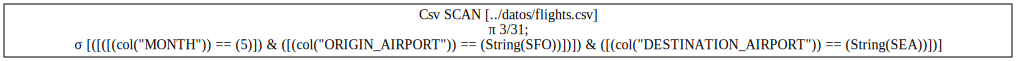

In [27]:
q.show_graph(optimized=True)


En contraste, si llamamos al método <code>show_graph()</code> con el argumento <code>optimized</code> definido como <code>False</code>, obtenemos que se realiza un escaneo del archivo CSV, se cargan las 31 columnas, y sólo entonces se realiza la operación de filtrado.

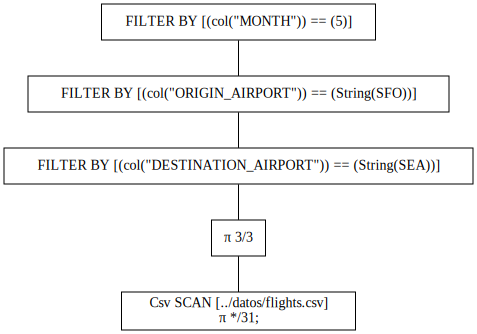

In [28]:
q.show_graph(optimized=False)

Para ejecutar las consultas, llamamos al método <code>collect()</code>, el cual regresa el resultado de las consultas en un <code>DataFrame</code> de Polars

In [29]:
q.collect()

MONTH,ORIGIN_AIRPORT,DESTINATION_AIRPORT
i64,str,str
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
…,…,…
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""


## Explicit Lazy Evaluation

Cuando usamos la función <code>read_csv()</code> para leer un archivo CSV, Polar usará una ejecución eager e inmediatamente cargará el dataframe. 


In [30]:
df = (
    pl.read_csv('../datos/flights.csv')
    .select(['MONTH', 'ORIGIN_AIRPORT','DESTINATION_AIRPORT'])
    .filter(
        (pl.col('MONTH') == 5) & 
        (pl.col('ORIGIN_AIRPORT') == 'SFO') &
        (pl.col('DESTINATION_AIRPORT') == 'SEA'))
    )
df

MONTH,ORIGIN_AIRPORT,DESTINATION_AIRPORT
i64,str,str
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
…,…,…
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""


Después de cargar el archivo CSV, se realiza la selección de columnas seguido del filtrado de filas. Todas estas consultas son ejecutadas de forma secuencial una después de otra. Esto dado que <code>read_csv()</code> no utiliza de forma implícita lazy evaluation.

Para asegurar que todas las consultas subsecuentes a la carga del CSV sean optimizadas, podemos hacer explícito el uso de lazy evaluation al utilizar el método <code>lazy()</code> inmediatamente después de la función <code>read_csv()</code>.

In [31]:
q = (
    pl.read_csv('../datos/flights.csv')
    .lazy()
    .select(['MONTH', 'ORIGIN_AIRPORT','DESTINATION_AIRPORT'])
    .filter(
        (pl.col('MONTH') == 5) & 
        (pl.col('ORIGIN_AIRPORT') == 'SFO') &
        (pl.col('DESTINATION_AIRPORT') == 'SEA'))
    )
df = q.collect()
display(df)

MONTH,ORIGIN_AIRPORT,DESTINATION_AIRPORT
i64,str,str
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
…,…,…
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""


La función <code>lazy()</code> regresa un objeto <code>LazyFrame</code> con el que podemos encadenar consultas posteriores usando métodos como <code>select()</code>, <code>filter()</code>, entre otros. Estos métodos serán optimizados ahora optimizados antes de su ejecución.

## Referencias 
* Python Polars: The Definitive Guide
* DuckDB : Up and Running